<a href="https://colab.research.google.com/github/YashD2109/CBT-CIP/blob/main/iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

iris flower classification

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.



Although the Scikit-learn library provides a dataset for iris flower classification, you can also download the same dataset from here for the task of iris flower classification with Machine Learning.

Dataset Details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Statistics Summary:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.6000

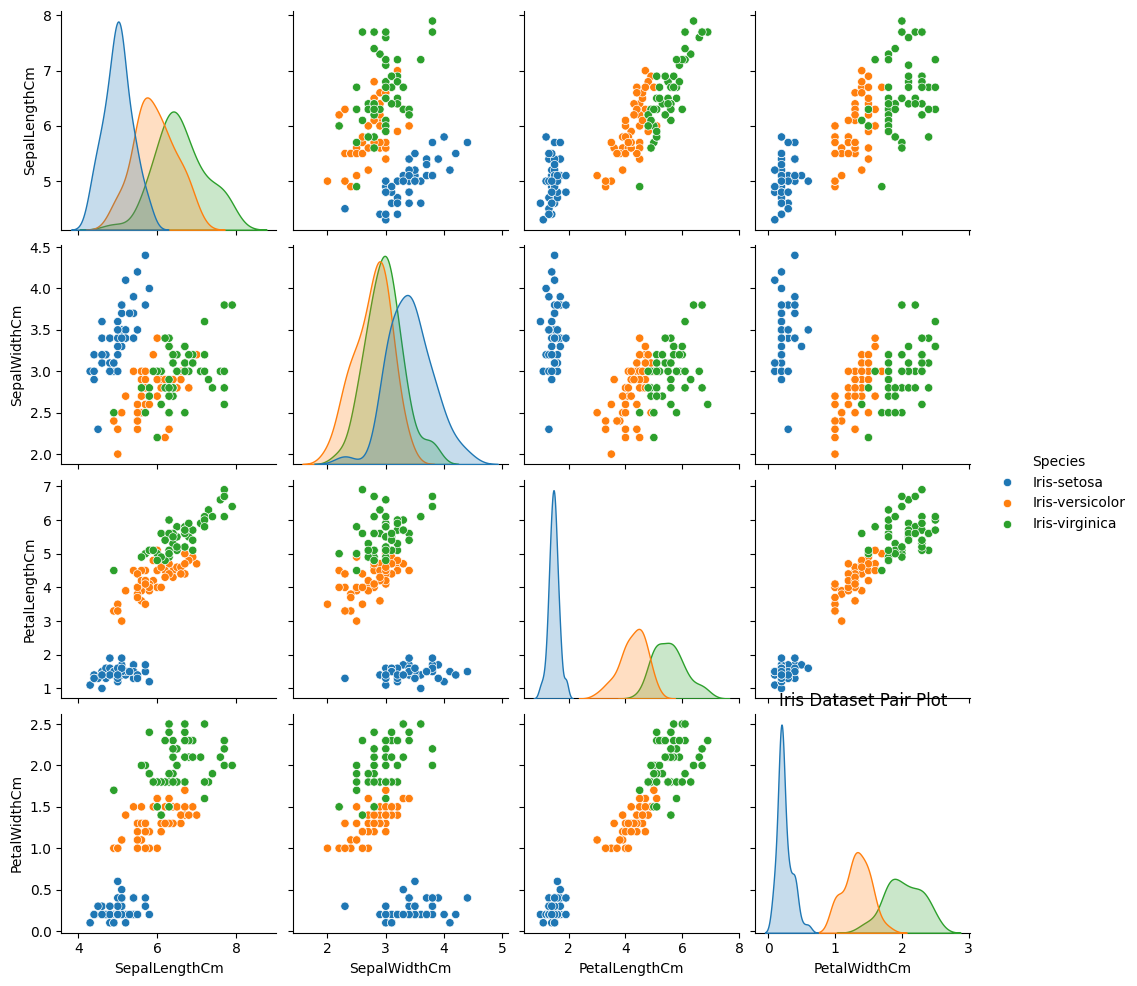


Model Accuracy: 1.0

Report of Classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



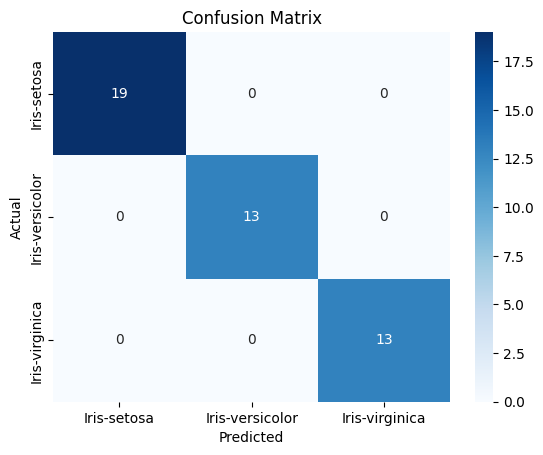


Importance of Features:
         Feature  Importance
3   PetalWidthCm    0.433982
2  PetalLengthCm    0.417308
0  SepalLengthCm    0.104105
1   SepalWidthCm    0.044605


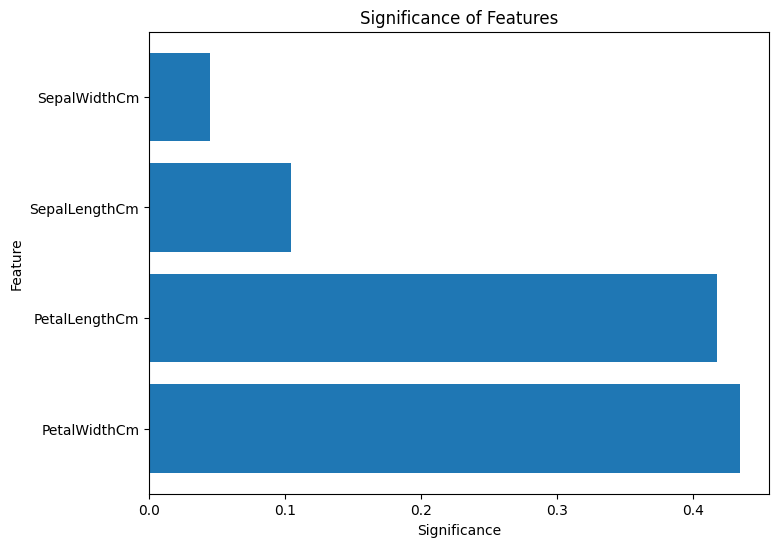

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://docs.google.com/spreadsheets/d/10bOCTxUKVI5WXkp6KuWOgFhMx6U1OiLPPc3d80omrVM/export?format=csv"
dataset = pd.read_csv(url)

print("Dataset Details:")
print(dataset.info())
print("\nStatistics Summary:")
print(dataset.describe())

print("\nMissing Values Check:")
print(dataset.isnull().sum())
dataset = dataset.dropna()

sns.pairplot(dataset, hue='Species', vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
plt.title("Iris Dataset Pair Plot")
plt.show()

features = dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
target = dataset['Species']

label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

f_train, f_test, t_train, t_test = train_test_split(features, target, test_size=0.3, random_state=42)

forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(f_train, t_train)

t_predictions = forest_model.predict(f_test)

model_accuracy = accuracy_score(t_test, t_predictions)
print("\nModel Accuracy:", model_accuracy)

print("\nReport of Classification:")
print(classification_report(t_test, t_predictions))

conf_matrix = confusion_matrix(t_test, t_predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

importance_values = forest_model.feature_importances_
feature_columns = features.columns
importance_data = pd.DataFrame({'Feature': feature_columns, 'Importance': importance_values})
importance_data = importance_data.sort_values(by='Importance', ascending=False)
print("\nImportance of Features:")
print(importance_data)

plt.figure(figsize=(8, 6))
plt.barh(importance_data['Feature'], importance_data['Importance'])
plt.xlabel("Significance")
plt.ylabel("Feature")
plt.title("Significance of Features")
plt.show()
